#### Loading of necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#### Images loading and looking for samples

(-0.5, 63.5, 63.5, -0.5)

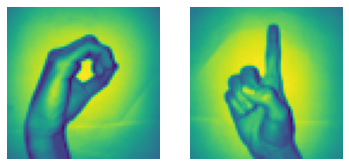

In [23]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

#### Form dataset , only "0" and "1" sign images has been concatenated


In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


#### Train-test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=13)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

#### 3-D matrix has been converted to 2-D 

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


#### Renamed variables

In [28]:
x_train = X_train_flatten
x_test = X_test_flatten
y_train = Y_train
y_test = Y_test

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (348, 4096)
x_test:  (62, 4096)
y_train:  (348, 1)
y_test:  (62, 1)


### Implementing with keras library

#####   Lets look at some parameters of keras library:

* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
* Adam is one of the most effective optimization algorithms for training neural networks.
* Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.

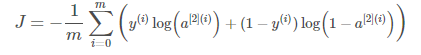

* metrics: it is accuracy.
* cross_val_score: use cross validation. If you do not know cross validation please chech it from my machine learning tutorial.                    
                        https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners


* epochs: number of iteration

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 150)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5302
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.4957
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4957
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.6207
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.6078
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5216
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.4957
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6897
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.6552
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.8750
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 997us/step - loss: 0.0505 - accuracy: 0.9871
Epoch 85/150
8/8 [==============================] - 0s 872us/step - loss: 0.0576 - accuracy: 0.9784
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9871
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9828
Epoch 88/150
8/8 [==============================] - 0s 997us/step - loss: 0.0540 - accuracy: 0.9871
Epoch 89/150
8/8 [==============================] - 0s 873us/step - loss: 0.0426 - accuracy: 0.9871
Epoch 90/150
8/8 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9871
Epoch 91/150
8/8 [==============================] - 0s 997us/step - loss: 0.0494 - accuracy: 0.9828
Epoch 92/150
8/8 [==============================] - 0s 873us/step - loss: 0.0535 - accuracy: 0.9828
Epoch 93/150
8/8 [==============================] - 0s 997us/step - loss: 0.0414 - accuracy: 0.9914
Epoch 94/150
8/8 [=

8/8 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.5388
Epoch 16/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.5345
Epoch 17/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6681
Epoch 18/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.5647
Epoch 19/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.7543
Epoch 20/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.6121
Epoch 21/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7672
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7586
Epoch 23/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7543
Epoch 24/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7888
Epoch 25/150
8/8 [===============

8/8 [==============================] - 0s 871us/step - loss: 0.1358 - accuracy: 0.9698
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9612
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9698
Epoch 101/150
8/8 [==============================] - 0s 999us/step - loss: 0.1357 - accuracy: 0.9655
Epoch 102/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9698
Epoch 103/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9871
Epoch 104/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9828
Epoch 105/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9871
Epoch 106/150
8/8 [==============================] - 0s 1000us/step - loss: 0.1148 - accuracy: 0.9784
Epoch 107/150
8/8 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9871
Epoch 108/150
8/8 

8/8 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8879
Epoch 31/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.9181
Epoch 32/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8664
Epoch 33/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.9224
Epoch 34/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.9181
Epoch 35/150
8/8 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.9224
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.9353
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.9095
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.9267
Epoch 39/150
8/8 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.9397
Epoch 40/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9698
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9698
Epoch 115/150
8/8 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9741
Epoch 116/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9784
Epoch 117/150
8/8 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9784
Epoch 118/150
8/8 [==============================] - 0s 1000us/step - loss: 0.2088 - accuracy: 0.9871
Epoch 119/150
8/8 [==============================] - 0s 997us/step - loss: 0.2073 - accuracy: 0.9871
Epoch 120/150
8/8 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9828
Epoch 121/150
8/8 [==============================] - 0s 872us/step - loss: 0.2047 - accuracy: 0.9914
Epoch 122/150
8/8 [==============================] - 0s 997us/step - loss: 0.2066 - accuracy: 0.9784
Epoch 123/150
8

#### Accuracy mean: 0.9655172427495321
#### Accuracy variance: 0.01862281429314885